<a href="https://colab.research.google.com/github/emkafie/PCVK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum - Week 3**


# **D1. Operasi Citra Sederhana**

Akses folder images pada Google Drive

Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu
dan menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk
melakukan transformasi linier brightness adalah sebagai berikut:

𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b
adalah nilai brightness.

# **Transformasi Linear Brightness**

Formula: g(x, y)=f(x,y)+b

**g(x, y)** adalah nilai pixel setelah transformasi, **f(x,y)** adalah nilai pixel asli, **b** adalah nilai brightness


 Mengubah tingkat kecaraan citra
--------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-1287683284.py:19: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


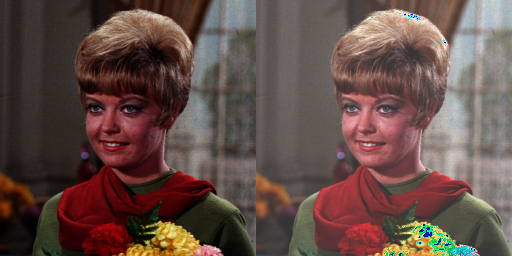

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecaraan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#aksek per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

#acara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **Tugas Praktikum D1**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori,

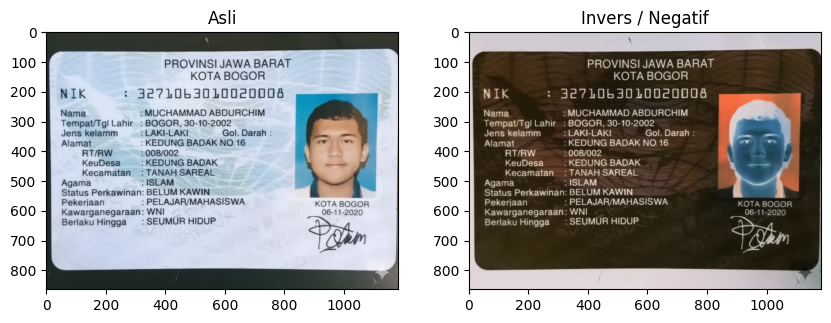

In [4]:
import cv2
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Image/KTP_OHIM.png"

# Baca gambar
img = cv2.imread(path)

# Konversi ke RGB untuk ditampilkan dengan matplotlib
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tampilkan gambar asli
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(imgRGB)
plt.title("Asli")

# Buat invers (negatif)
img_invers = cv2.bitwise_not(imgRGB)

# Tampilkan gambar invers
plt.subplot(1,2,2)
plt.imshow(img_invers)
plt.title("Invers / Negatif")

plt.show()

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras,

* Mengubah tingkat kecerahan dan kontras citra *
------------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


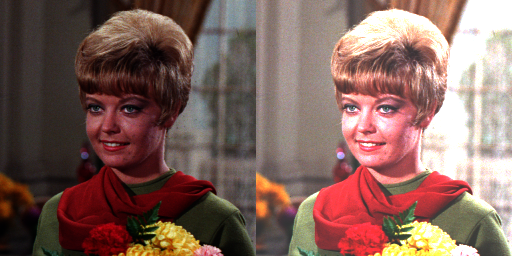

In [5]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print("* Mengubah tingkat kecerahan dan kontras citra *")
print("------------------------------------------------")

# Input brightness dan kontras
try:
    brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
except ValueError:
    print("Error, input brightness bukan angka")
    brightness = 0

try:
    contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))
except ValueError:
    print("Error, input kontras bukan angka")
    contrast = 1.0

# Baca citra
path = "/content/drive/MyDrive/Image/female.tiff"
original = cv.imread(path)

if original is None:
    print("Error: Gagal load gambar. Cek path atau nama file.")
else:
    # Transformasi kontras dan brightness
    adjusted = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

    # Gabungkan hasil samping-sampingan
    final_frame = cv.hconcat([original, adjusted])

    # Tampilkan hasil
    cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log,

* Mengubah tingkat kecerahan citra dengan Transformasi Log *
------------------------------------------------------------
Masukkan nilai kecerahan: 50


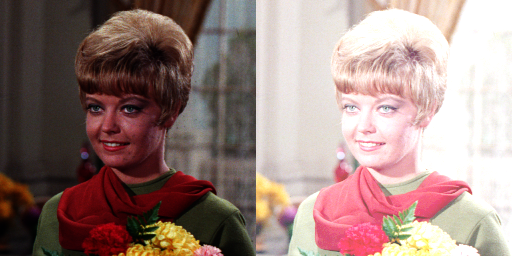

In [6]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print("* Mengubah tingkat kecerahan citra dengan Transformasi Log *")
print("------------------------------------------------------------")

# Input brightness
try:
    brightness = int(input("Masukkan nilai kecerahan: "))
except ValueError:
    print("Error, input bukan angka")
    brightness = 0

# Baca citra
path = "/content/drive/MyDrive/Image/female.tiff"
original = cv.imread(path)

if original is None:
    print("Error: Gagal load gambar. Cek path atau nama file.")
else:
    # Konversi ke float untuk log transform
    img_float = original.astype(np.float32)

    # Terapkan transformasi log
    c = 255 / np.log(1 + np.max(img_float))  # konstanta skala
    log_transformed = c * (np.log(1 + img_float))

    # Tambahkan brightness
    log_brightness = np.clip(log_transformed + brightness, 0, 255)

    # Kembalikan ke uint8
    log_brightness = np.uint8(log_brightness)

    # Gabungkan citra asli & hasil
    final_frame = cv.hconcat([original, log_brightness])

    # Tampilkan hasil
    cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori,

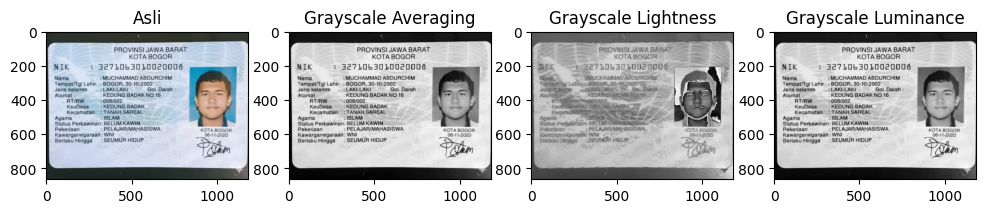

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra berwarna
path = "/content/drive/MyDrive/Image/KTP_OHIM.png"
img = cv.imread(path)

if img is None:
    print("Error: Gagal load gambar. Cek path atau nama file.")
else:
    # Konversi BGR ke RGB untuk matplotlib
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # --- 1. Grayscale Averaging ---
    gray_avg = np.mean(imgRGB, axis=2).astype(np.uint8)

    # --- 2. Grayscale Lightness ---
    gray_light = ((np.max(imgRGB, axis=2) + np.min(imgRGB, axis=2)) / 2).astype(np.uint8)

    # --- 3. Grayscale Luminance ---
    gray_lum = (0.299*imgRGB[:,:,0] + 0.587*imgRGB[:,:,1] + 0.114*imgRGB[:,:,2]).astype(np.uint8)

    # --- Tampilkan hasil ---
    plt.figure(figsize=(12,6))

    plt.subplot(1,4,1)
    plt.imshow(imgRGB)
    plt.title("Asli")

    plt.subplot(1,4,2)
    plt.imshow(gray_avg, cmap='gray')
    plt.title("Grayscale Averaging")

    plt.subplot(1,4,3)
    plt.imshow(gray_light, cmap='gray')
    plt.title("Grayscale Lightness")

    plt.subplot(1,4,4)
    plt.imshow(gray_lum, cmap='gray')
    plt.title("Grayscale Luminance")

    plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale

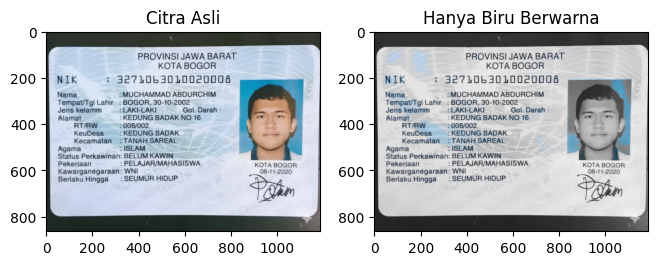

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
path = "/content/drive/MyDrive/Image/KTP_OHIM.png"
img = cv.imread(path)

if img is None:
    print("Error: Gagal load gambar. Cek path atau nama file.")
else:
    # Konversi BGR ke RGB for matplotlib
    imgRGB = cv.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Konversi BGR ke HSV
    imgHSV = cv.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Rentang warna biru (HSV)
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([140, 255, 255])

    # Buat mask untuk warna biru
    mask = cv.inRange(imgHSV, lower_blue, upper_blue)

    # Ekstrak hanya bagian biru dari citra asli
    color_part = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

    # Citra grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_rgb = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

    # Gabungkan: biru tetap, lain grayscale
    final = np.where(mask[:,:,None].astype(bool), color_part, gray_rgb)

    # --- Tampilkan hasil ---
    plt.figure(figsize=(12,6))

    plt.subplot(1,3,1)
    plt.imshow(imgRGB)
    plt.title("Citra Asli")

    plt.subplot(1,3,2)
    plt.imshow(final)
    plt.title("Hanya Biru Berwarna")

    plt.show()

# **D2. Operasi Aritmatika dan Logika**

**1. Buat Gamma Correction sesuai dengan petunjuk**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna.

 Gamma Correction pada citra 
--------------------------------
Masukkan nilai Gamma: 3


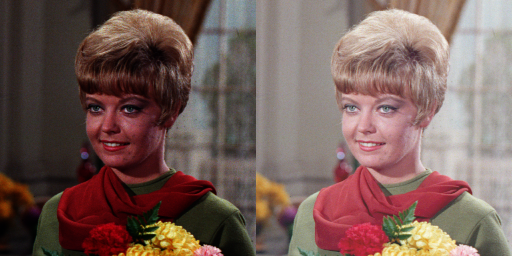

In [11]:
print(' Gamma Correction pada citra ')
print('--------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

  # Baca citra
path = "/content/drive/MyDrive/Image/female.tiff"
original = cv.imread(path)

if original is None:
    print("Error: Gagal load gambar. Cek path atau nama file.")
else:
    # Normalisasi ke [0,1]
    img_float = original.astype(np.float32) / 255.0

    # Terapkan gamma correction dengan inverse (1/gamma)
    gamma_corrected = np.power(img_float, 1.0/gamma)

    # Kembalikan ke [0,255]
    gamma_corrected = np.uint8(gamma_corrected * 255)

    # Gabungkan citra asli & hasil
    final_frame = cv.hconcat([original, gamma_corrected])

    # Tampilkan hasil
    cv2_imshow(final_frame)

**2. Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi
citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit).
Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0
(000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit.
Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

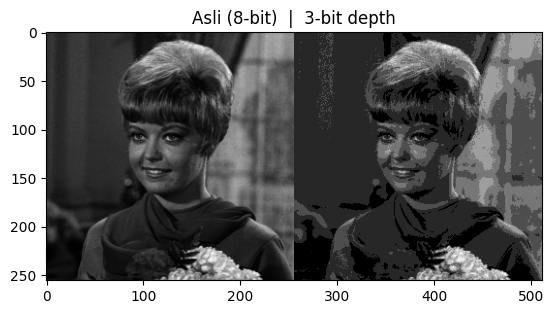

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra grayscale
original = cv.imread("/content/drive/MyDrive/Image/female.tiff", cv.IMREAD_GRAYSCALE)

# Tentukan bit depth baru
bit_depth = 3  # contoh: 3-bit depth

# Hitung level kuantisasi
level = 255 / (pow(2, bit_depth) - 1)

# Kuantisasi citra
quantized = np.round(original / level) * level
quantized = np.uint8(quantized)

# Gabungkan dua gambar (asli & hasil) secara horizontal
combined = np.hstack((original, quantized))

# Tampilkan dalam satu axes
plt.imshow(combined, cmap='gray')
plt.title(f"Asli (8-bit)  |  {bit_depth}-bit depth")
plt.show()

**3. Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg

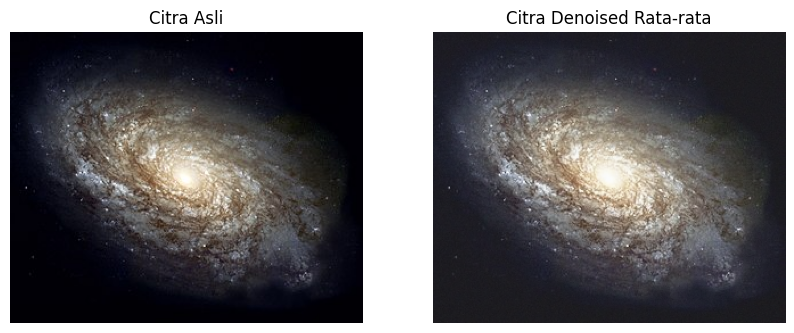

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Path ke citra berisik (noisy)
noisy_images_path = '/content/drive/MyDrive/Image/noises/noises/*.jpg'
original_image_path = '/content/drive/MyDrive/Image/galaxy.jpg'

# Baca citra berisik
cv_img = []
for img_path in glob.glob(noisy_images_path):
    n = cv.imread(img_path)
    if n is not None:
        cv_img.append(n)

# Periksa apakah citra berhasil dimuat
if not cv_img:
    print("Error: Tidak ada citra berisik yang ditemukan. Periksa path.")
else:
    # Ubah daftar citra menjadi array numpy untuk pemrosesan yang lebih mudah
    noisy_images = np.array(cv_img)

    # Hitung citra rata-rata (denoised)
    average_image = np.mean(noisy_images, axis=0).astype(np.uint8)

    # Baca citra asli
    original_image = cv.imread(original_image_path)

    # Tampilkan citra asli dan citra hasil denoising
    if original_image is not None:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title("Citra Asli")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(average_image, cv2.COLOR_BGR2RGB))
        plt.title("Citra Denoised Rata-rata")
        plt.axis('off')

        plt.show()
    else:
        print("Error: Gagal memuat citra asli. Periksa path.")

# Task
Modify the code to perform average denoising on a varying number of noisy images (10, 20, 40, 80, 100), calculate the PSNR for each case, record the results, and provide a conclusion based on the findings.

## Modify code for varying image counts

### Subtask:
Modify the existing code to allow processing of a specified number of noisy images for averaging.


**Reasoning**:
The subtask is to modify the existing code to process a specified number of noisy images. I will add a parameter for the number of images and modify the image loading loop to only load that number of images.



Total citra berisik yang ditemukan: 100

--- Memproses untuk 10 citra ---
Nilai PSNR untuk 10 citra: 19.7356 dB


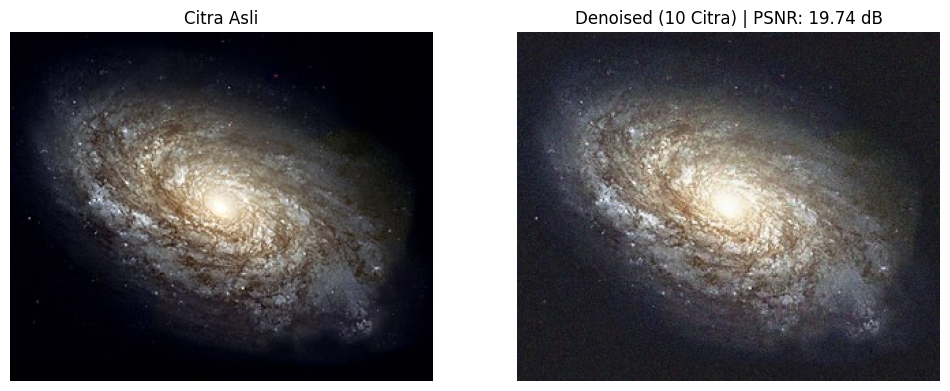

------------------------------

--- Memproses untuk 20 citra ---
Nilai PSNR untuk 20 citra: 19.8405 dB


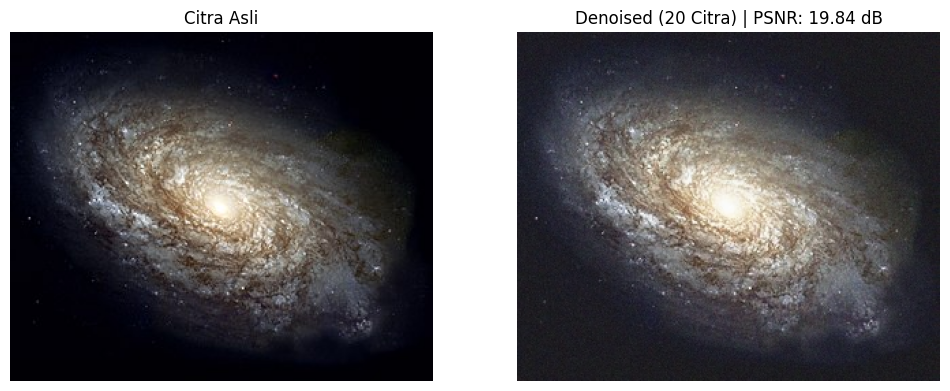

------------------------------

--- Memproses untuk 40 citra ---
Nilai PSNR untuk 40 citra: 19.8928 dB


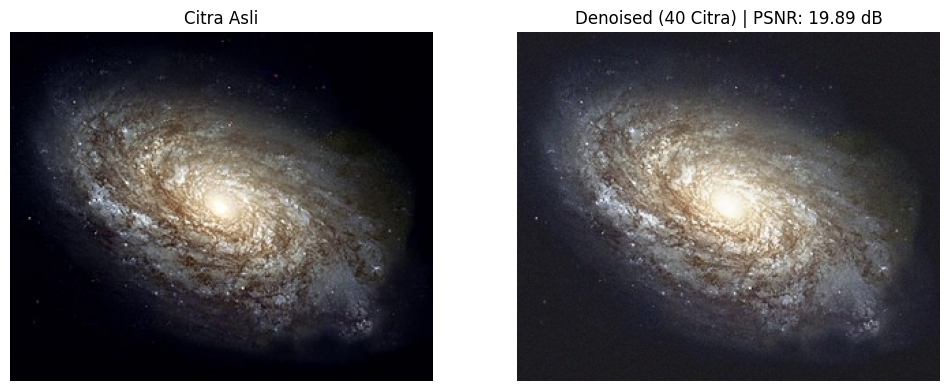

------------------------------

--- Memproses untuk 80 citra ---
Nilai PSNR untuk 80 citra: 19.9159 dB


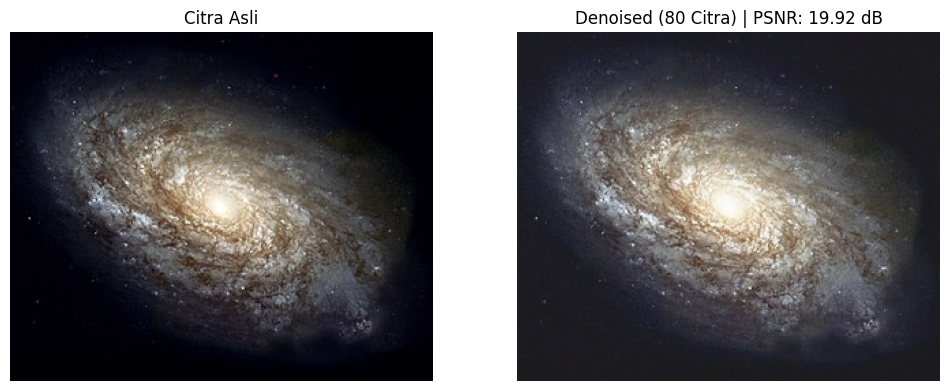

------------------------------

--- Memproses untuk 100 citra ---
Nilai PSNR untuk 100 citra: 19.9220 dB


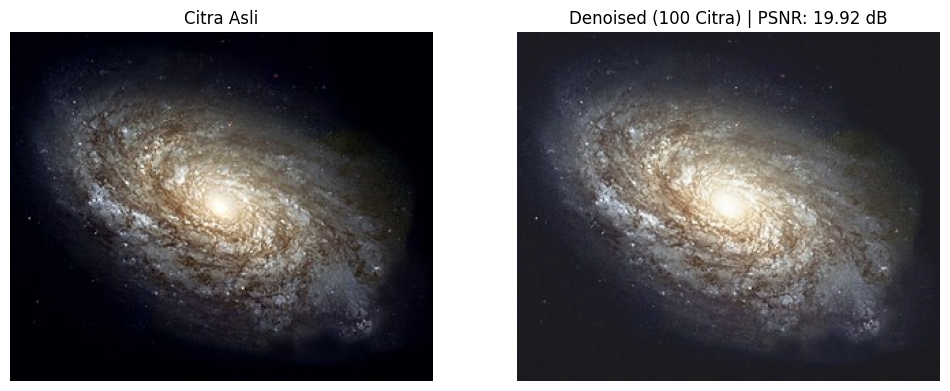

------------------------------



In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Path ke citra berisik (noisy) dan citra asli
noisy_images_path = '/content/drive/MyDrive/Image/noises/noises/*.jpg'
original_image_path = '/content/drive/MyDrive/Image/galaxy.jpg'

def perform_average_denoising(image_paths_list):
    """
    Performs average denoising on a list of noisy image paths.

    Args:
        image_paths_list: A list of paths to the noisy images.

    Returns:
        The denoised image.
    """
    cv_img = []
    for img_path in image_paths_list:
        n = cv2.imread(img_path)
        if n is not None:
            cv_img.append(n)

    # Periksa apakah citra berhasil dimuat
    if not cv_img:
        print("Error: Tidak ada citra berisik yang dimuat.")
        return None

    # Ubah daftar citra menjadi array numpy untuk pemrosesan yang lebih mudah
    noisy_images = np.array(cv_img, dtype=np.float32)

    # Hitung citra rata-rata (denoised)
    average_image = np.mean(noisy_images, axis=0).astype(np.uint8)

    return average_image

# --- MAIN EXECUTION ---

# Baca citra asli sekali saja untuk perbandingan
original_image = cv2.imread(original_image_path)

if original_image is None:
    print(f"Error: Gagal memuat citra asli. Periksa path: {original_image_path}")
else:
    # List jumlah citra yang akan diuji
    num_images_to_average_list = [10, 20, 40, 80, 100]
    psnr_results = []

    # Dapatkan semua path citra berisik yang tersedia
    all_image_paths = sorted(glob.glob(noisy_images_path))

    if not all_image_paths:
        print(f"Error: Tidak ada citra berisik yang ditemukan di path: {noisy_images_path}")
    else:
        print(f"Total citra berisik yang ditemukan: {len(all_image_paths)}\n")

        for num_images in num_images_to_average_list:
            if num_images > len(all_image_paths):
                print(f"Melewati {num_images} citra karena hanya ditemukan {len(all_image_paths)} citra.")
                continue

            print(f"--- Memproses untuk {num_images} citra ---")

            # Ambil sejumlah citra sesuai iterasi
            image_paths_subset = all_image_paths[:num_images]

            # Lakukan denoising
            denoised_image = perform_average_denoising(image_paths_subset)

            if denoised_image is not None:
                # Hitung PSNR
                # Pastikan dimensi citra asli dan denoised sama
                if original_image.shape == denoised_image.shape:
                    psnr = cv2.PSNR(original_image, denoised_image)
                    psnr_results.append({'count': num_images, 'psnr': psnr})
                    print(f"Nilai PSNR untuk {num_images} citra: {psnr:.4f} dB")

                    # Tampilkan hasil visual
                    plt.figure(figsize=(12, 6))
                    plt.subplot(1, 2, 1)
                    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
                    plt.title("Citra Asli")
                    plt.axis('off')

                    plt.subplot(1, 2, 2)
                    plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
                    plt.title(f"Denoised ({num_images} Citra) | PSNR: {psnr:.2f} dB")
                    plt.axis('off')

                    plt.show()
                else:
                    print("Error: Dimensi citra asli dan hasil denoising tidak sama.")
            print("-" * 30 + "\n")


**Kesimpulan**

Semakin banyak gambar noise yang di rata-ratakan, maka:

Hasil gambar akan semakin bersih dan jernih.

Nilai PSNR-nya akan semakin tinggi, yang membuktikan kualitasnya semakin bagus dan mirip dengan gambar asli.

**4. Buat image masking**

Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

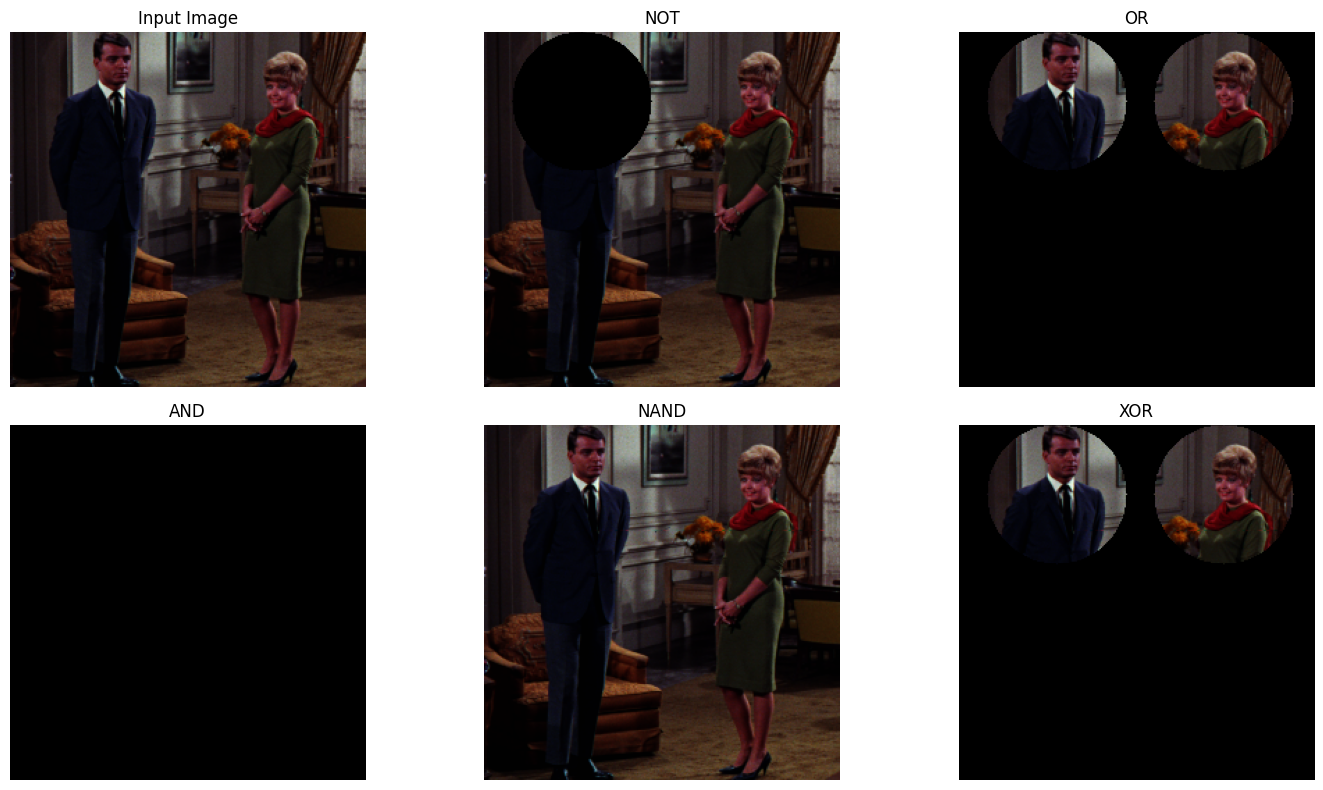

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke file gambar
image_path = "/content/drive/MyDrive/Image/couple.tiff"

# Baca gambar asli
img_bgr = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Dapatkan dimensi gambar
height, width, _ = img_bgr.shape

# Buat masker lingkaran pria
mask1 = np.zeros((height, width), dtype=np.uint8)
cv2.circle(mask1, (70, 50), 50, 255, -1)

# Buat masker lingkaran wanita
mask2 = np.zeros((height, width), dtype=np.uint8)
cv2.circle(mask2, (190, 50), 50, 255, -1)

# --- Operasi Logika ---
mask_not  = cv2.bitwise_not(mask1)               # NOT
mask_or   = cv2.bitwise_or(mask1, mask2)         # OR
mask_and  = cv2.bitwise_and(mask1, mask2)        # AND
mask_nand = cv2.bitwise_not(mask_and)            # NAND
mask_xor  = cv2.bitwise_xor(mask1, mask2)        # XOR

# Terapkan ke gambar asli
res_not  = cv2.bitwise_and(img_bgr, img_bgr, mask=mask_not)
res_or   = cv2.bitwise_and(img_bgr, img_bgr, mask=mask_or)
res_and  = cv2.bitwise_and(img_bgr, img_bgr, mask=mask_and)
res_nand = cv2.bitwise_and(img_bgr, img_bgr, mask=mask_nand)
res_xor  = cv2.bitwise_and(img_bgr, img_bgr, mask=mask_xor)

# Konversi ke RGB untuk matplotlib
results = {
    "NOT": cv2.cvtColor(res_not, cv2.COLOR_BGR2RGB),
    "OR": cv2.cvtColor(res_or, cv2.COLOR_BGR2RGB),
    "AND": cv2.cvtColor(res_and, cv2.COLOR_BGR2RGB),
    "NAND": cv2.cvtColor(res_nand, cv2.COLOR_BGR2RGB),
    "XOR": cv2.cvtColor(res_xor, cv2.COLOR_BGR2RGB),
}

# --- Tampilkan Hasil ---
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Input
axes[0,0].imshow(img_rgb)
axes[0,0].set_title("Input Image")
axes[0,0].axis("off")

# Hasil operasi
for ax, (title, output) in zip(axes.flat[1:], results.items()):
    ax.imshow(output)
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()

**Hasil analisa**

Kode ini secara efektif mengajarkan bagaimana operasi logika bitwise dapat digunakan sebagai alat yang sangat kuat untuk mengkombinasikan berbagai area (ROI) pada sebuah gambar. Dengan mendefinisikan masker sederhana (seperti lingkaran), kita bisa menghasilkan seleksi area yang kompleks (seperti gabungan, irisan, atau area eksklusif) untuk diisolasi atau dimodifikasi lebih lanjut.